In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score 
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

random_state = 42

In [2]:
data = pd.read_csv('./ML-Python-Lab-Data.csv', header=None, names=['Index','Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'], index_col='Index')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,,,,,,,,,
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


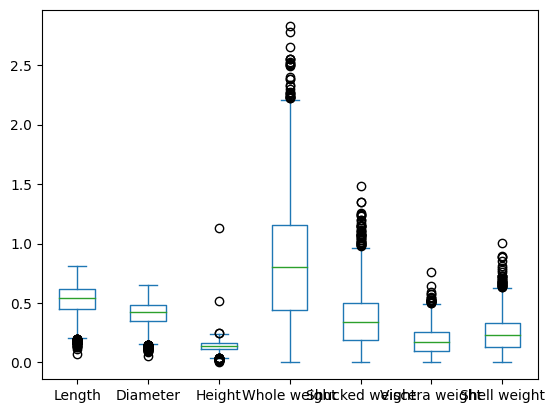

In [42]:
data['Rings'] = data['Rings'].astype(str)
data.plot.box();

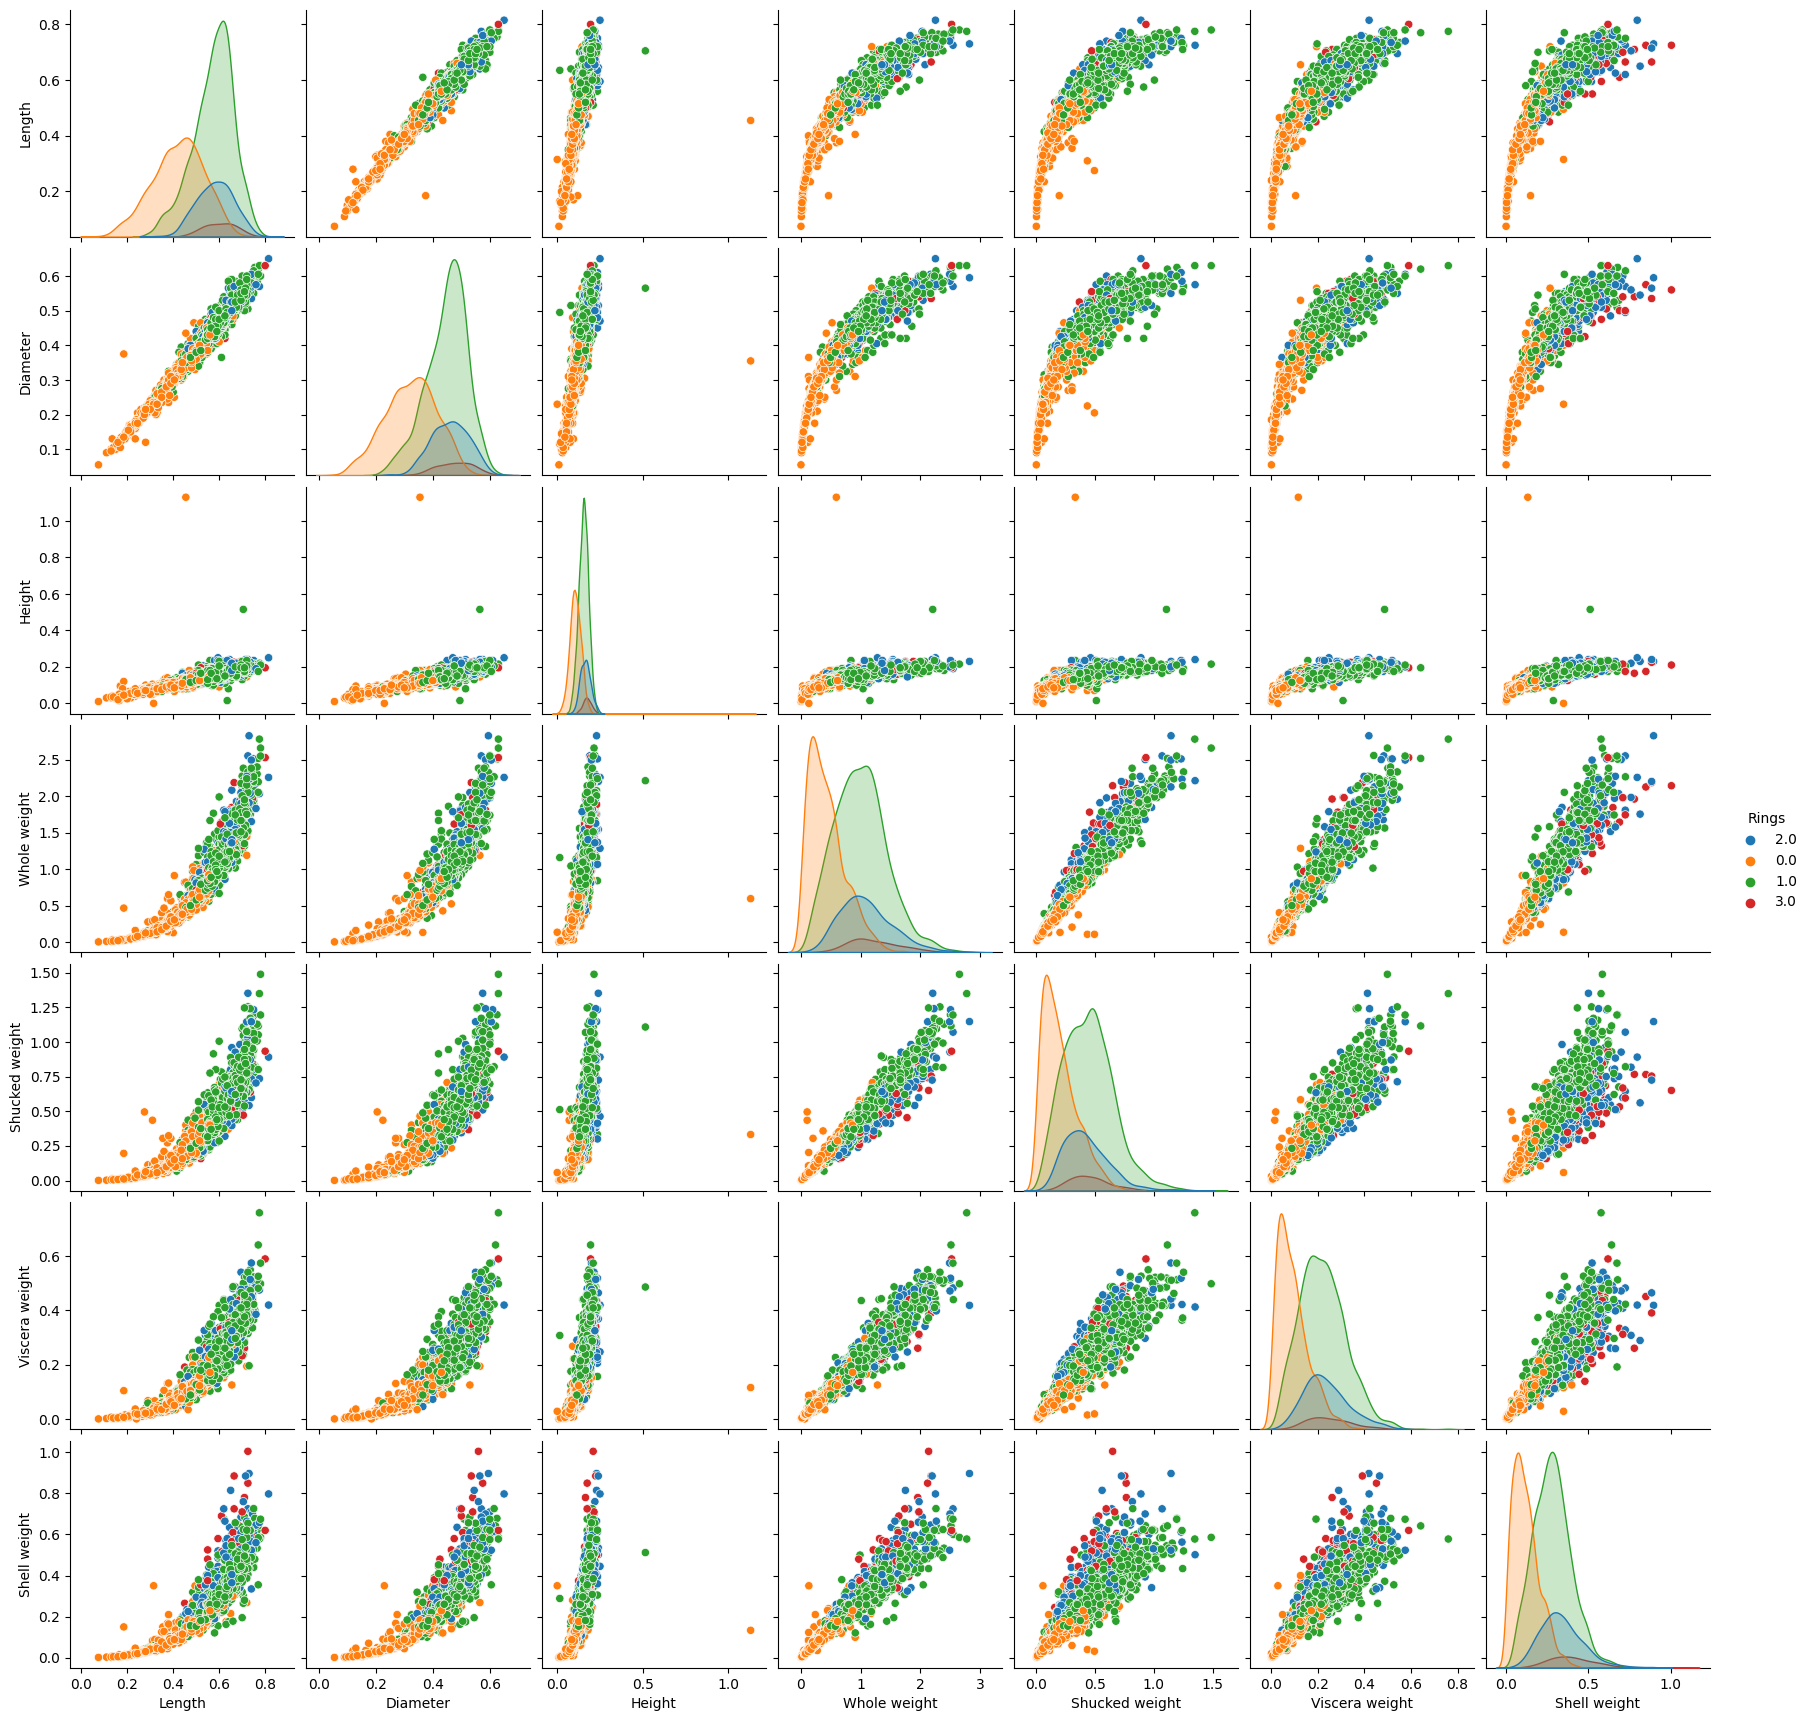

In [5]:
sns.pairplot(data, hue='Rings');

In [3]:
scaler = MinMaxScaler()
data.iloc[:,1:7] = data.iloc[:,1:7].apply(np.sqrt)
data.iloc[:,1:7] = scaler.fit_transform(data.iloc[:,1:7])

In [4]:
one_hot_encoder = OneHotEncoder()
sex = one_hot_encoder.fit_transform(data[['Sex']]).toarray()
sex_df = pd.DataFrame(sex)
sex_df.columns = names=np.array(one_hot_encoder.categories_).ravel()
data = pd.concat([data.drop('Sex', axis=1), sex_df], axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.637093,0.646542,0.289950,0.410840,0.372148,0.347819,0.150,2.0,0.0,0.0,1.0
1,0.505232,0.490219,0.282216,NaN,0.238857,0.232943,0.070,0.0,0.0,0.0,1.0
2,0.722119,0.723368,0.345643,NaN,0.399621,0.416525,0.210,1.0,1.0,0.0,0.0
3,0.619266,0.646542,0.332595,0.411691,0.364074,0.371169,0.155,1.0,0.0,0.0,1.0
4,0.477960,0.473066,0.266076,0.249387,0.225164,0.207654,0.055,0.0,0.0,1.0,0.0


In [5]:
data = data[~data.isnull().any(axis=1)] # remove rows with null values 
data.isnull().sum() > 0 # check column with null values

Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
F                 False
I                 False
M                 False
dtype: bool

In [9]:
data = data.drop('Diameter', axis=1)

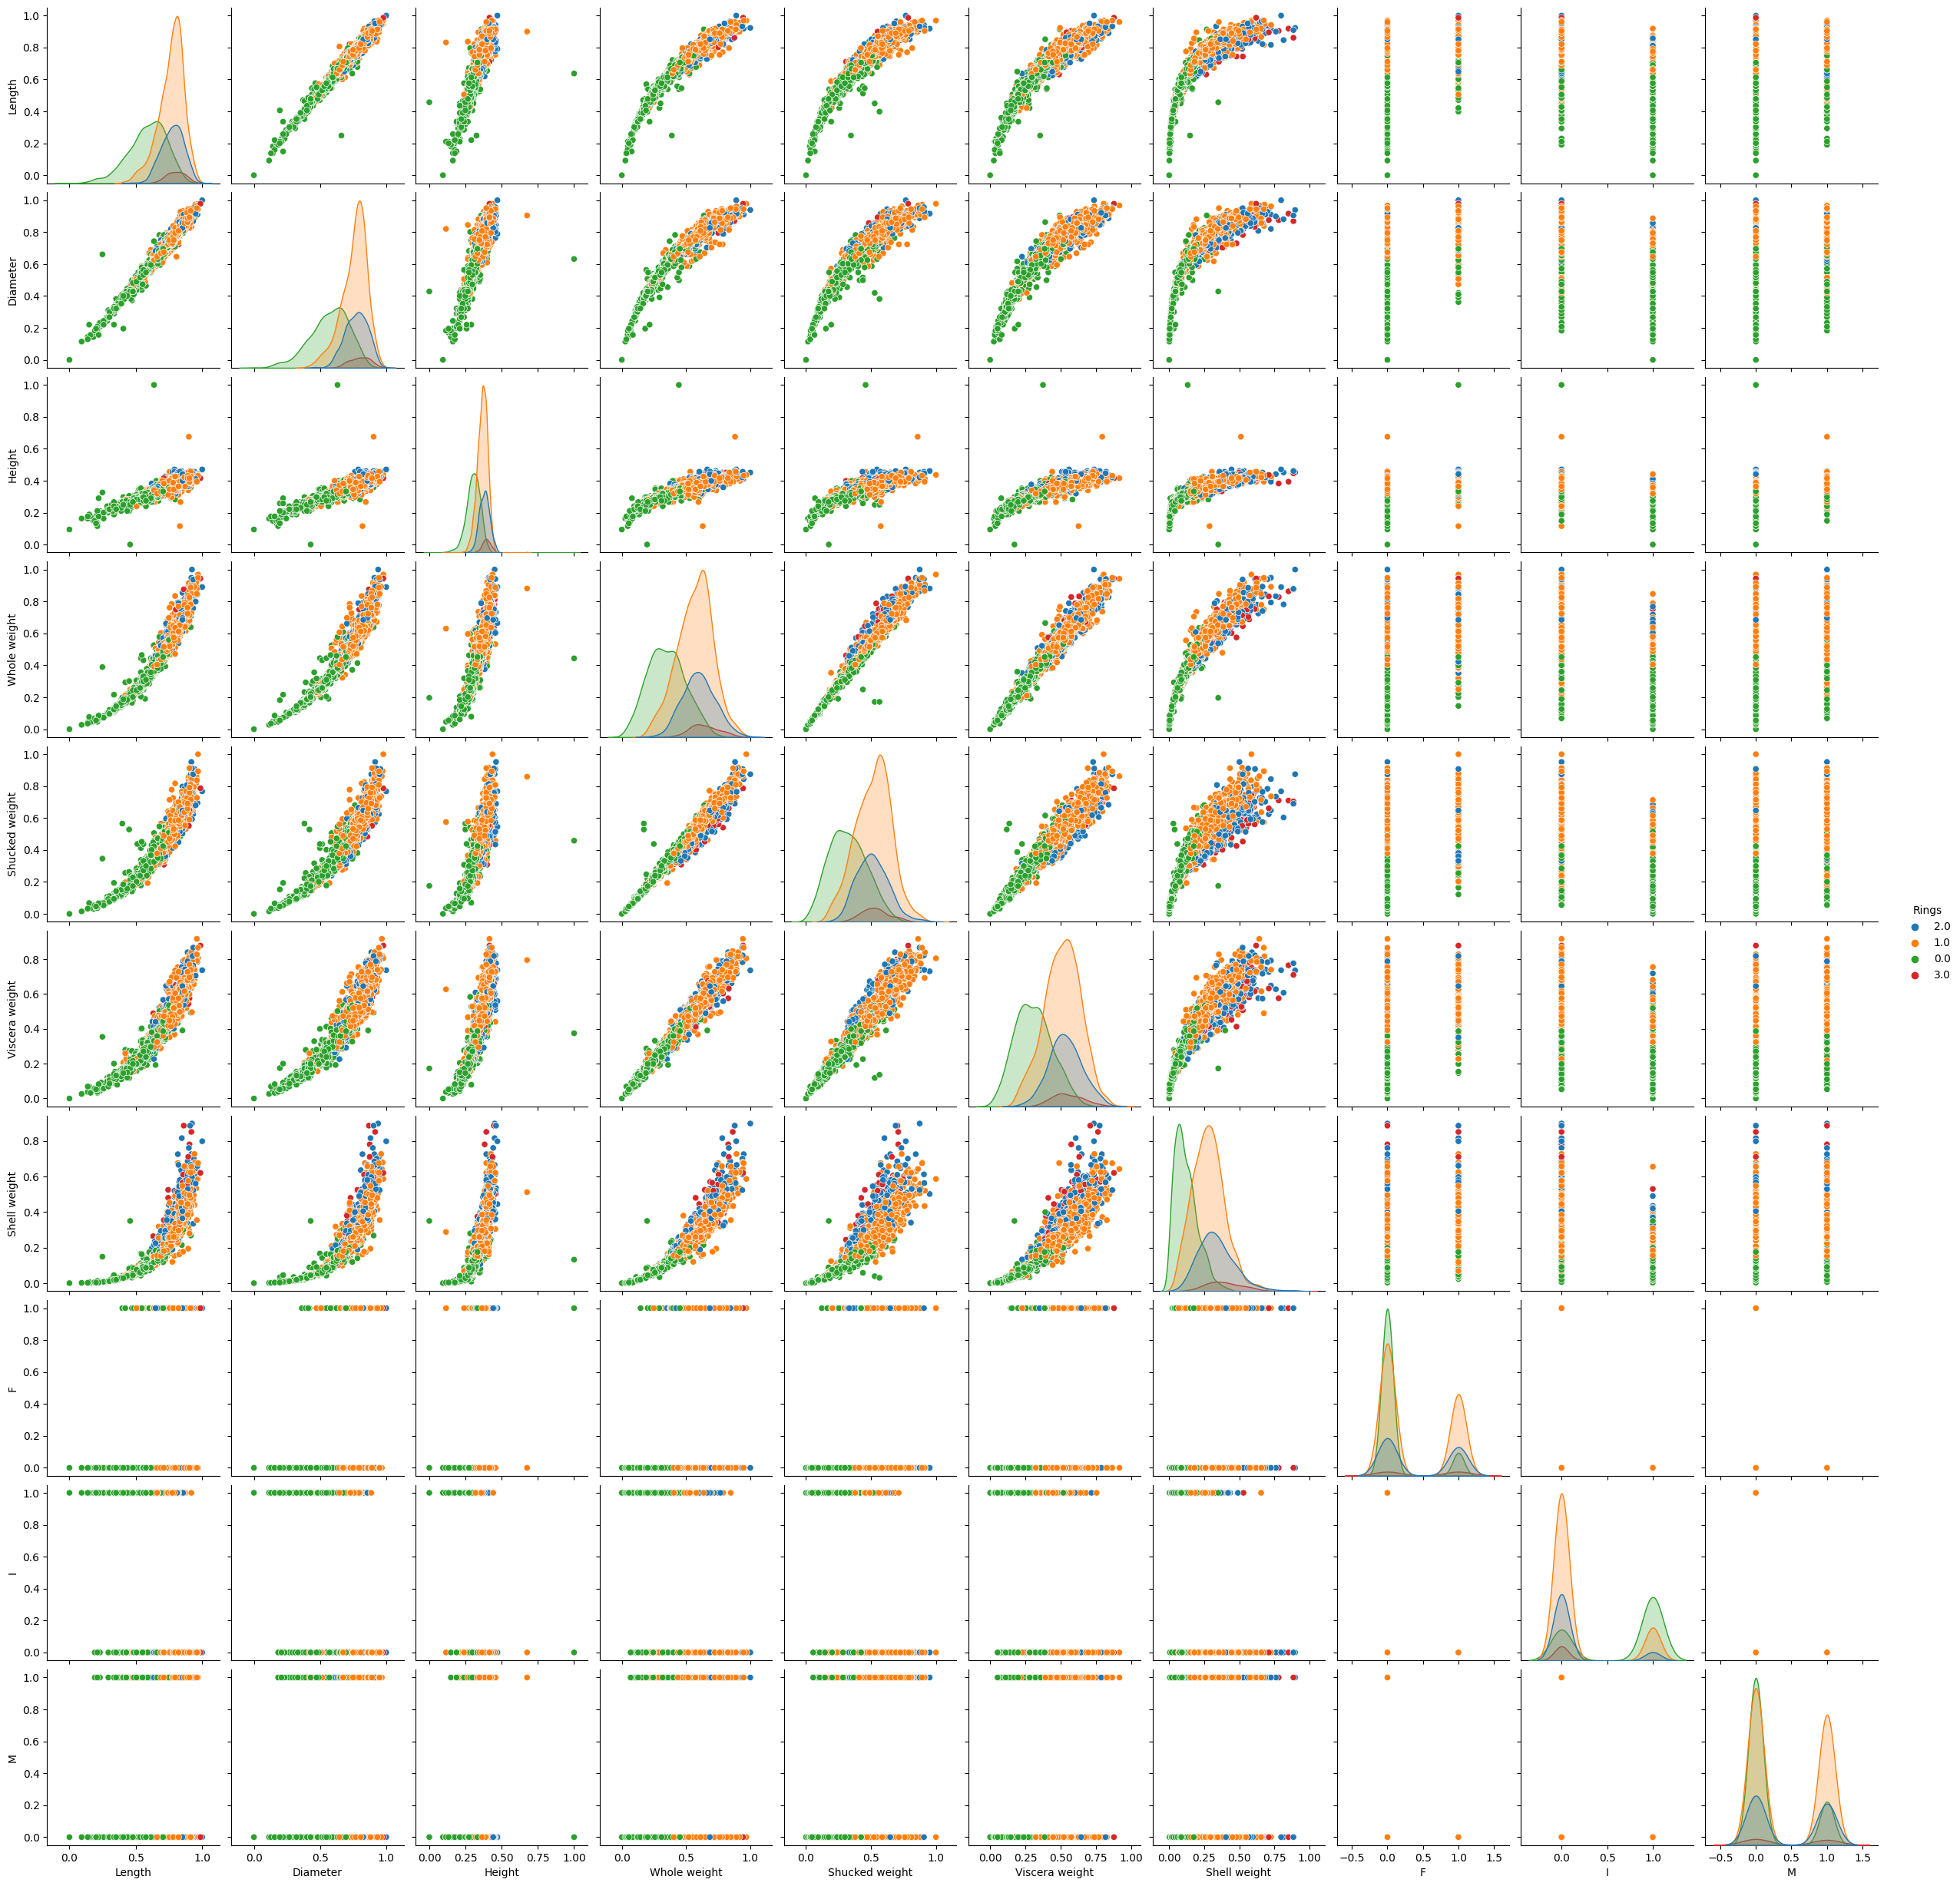

In [54]:
sns.pairplot(data, hue='Rings');

In [6]:
X = data.drop('Rings', axis=1)
y = data['Rings']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
y_pred = tree.predict(X_test)
avg_scores = []
parameter_values = range(1, tree.tree_.max_depth)
for max_depth in parameter_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    score = cross_val_score(tree, X_train, y_train, scoring='f1_macro')
    avg_scores.append(np.mean(score))


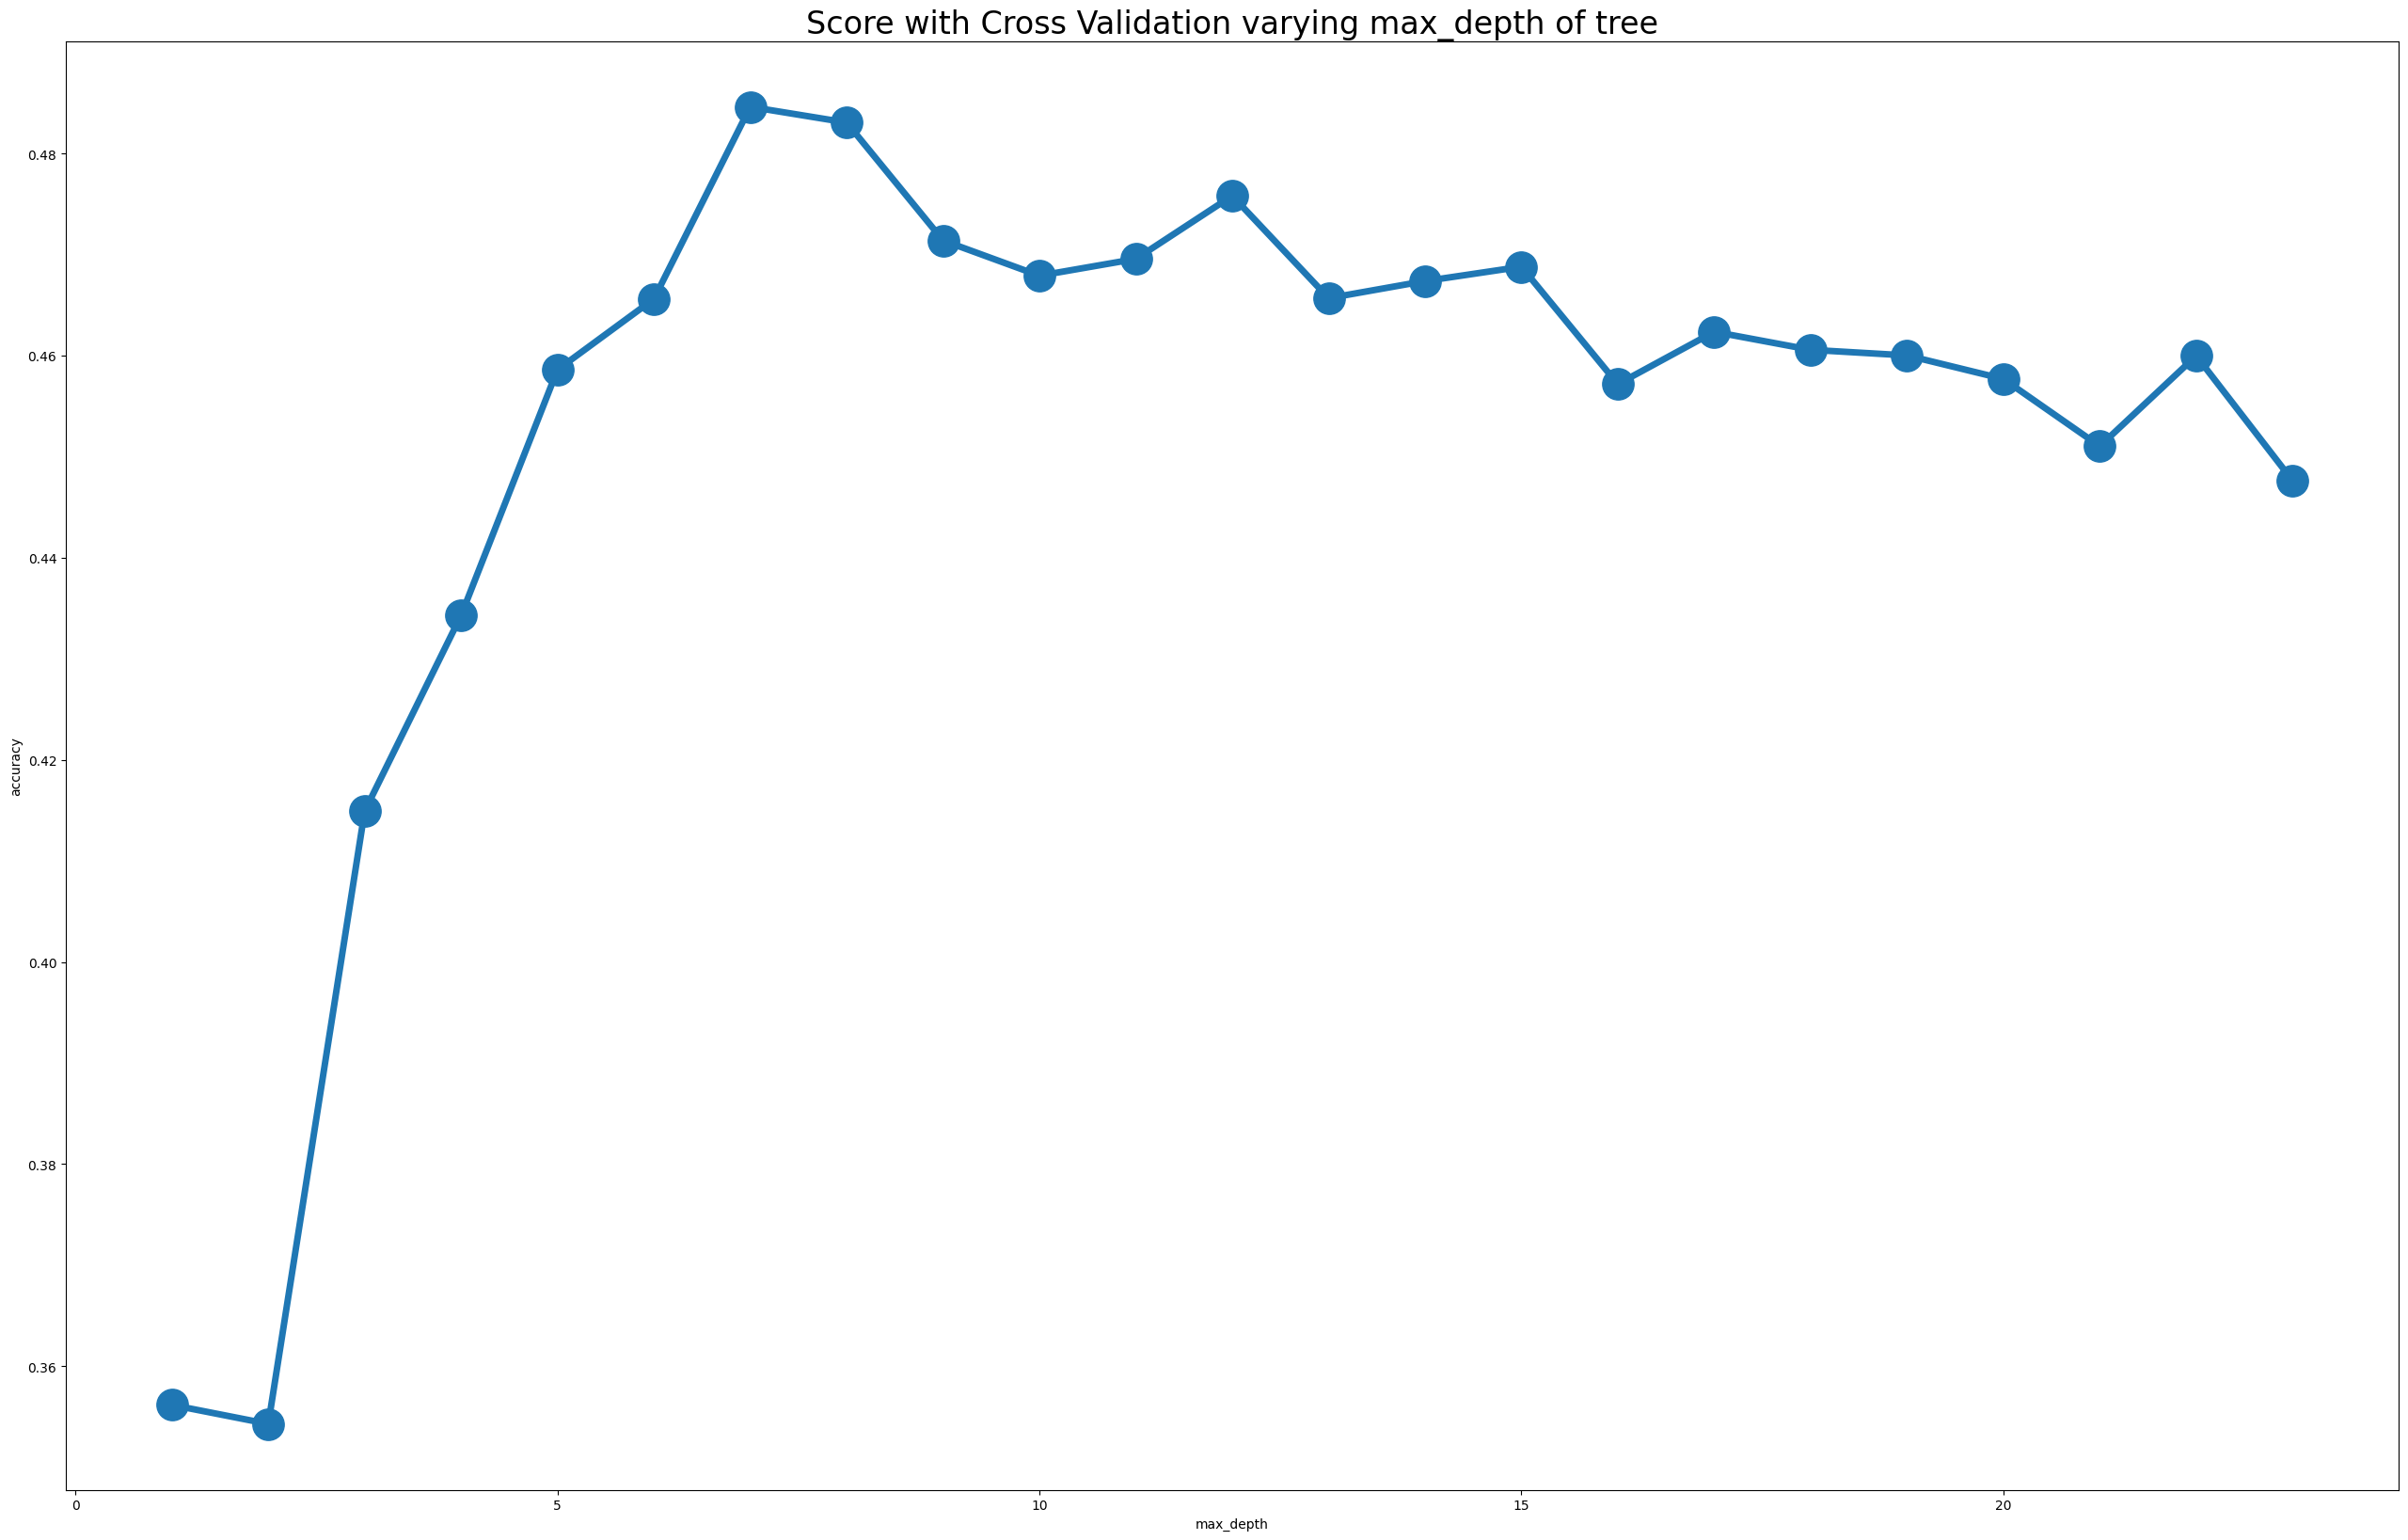

In [9]:
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with Cross Validation varying max_depth of tree", fontsize = 24)
plt.show();

In [10]:
best_parameter = parameter_values[np.argmax(avg_scores)]
tree = DecisionTreeClassifier(max_depth=best_parameter)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'classification report:\n{classification_report(y_test,y_pred)}')
print(f'confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'accuracy: {round(accuracy_score(y_test,y_pred) * 100, 2)}%')

classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70       234
         1.0       0.62      0.76      0.69       370
         2.0       0.37      0.32      0.34       133
         3.0       0.67      0.08      0.14        26

    accuracy                           0.62       763
   macro avg       0.61      0.45      0.47       763
weighted avg       0.63      0.62      0.61       763

confusion matrix:
[[148  81   5   0]
 [ 35 283  52   0]
 [  6  83  43   1]
 [  0   7  17   2]]
accuracy: 62.39%


In [11]:
params = {'n_estimators':[20,30,40,50], 'learning_rate':[0.5,0.75,1,1.25,1.5]}
parameters = list(ParameterGrid(params))
results = []
for i in range(len(parameters)):
    parameter = parameters[i]
    row = parameter.copy()
    ada = AdaBoostClassifier(**(parameter))
    score = cross_val_score(ada, X_train, y_train, scoring=make_scorer(f1_score, average='macro'))
    row['score'] = np.mean(score)
    row['i'] = i
    results.append(row)


results_df = pd.DataFrame(results)

In [36]:
results_df.head()

,learning_rate,n_estimators,score,i
0,0.50,20,0.386151,0
1,0.50,30,0.389275,1
2,0.50,40,0.399408,2
3,0.50,50,0.414582,3
4,0.75,20,0.424183,4


In [12]:
results_df.sort_values(by='score', ascending=False, inplace=True)
results_df.head()

,learning_rate,n_estimators,score,i
9,1.00,30,0.479534,9
12,1.25,20,0.479151,12
11,1.00,50,0.474911,11
7,0.75,50,0.470002,7
10,1.00,40,0.469797,10


In [13]:
best_parameter = parameters[int(results_df.iloc[0]['i'])]
ada = AdaBoostClassifier(**(best_parameter))
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(f'classification report:\n{classification_report(y_test,y_pred)}')
print(f'confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'accuracy: {round(accuracy_score(y_test,y_pred) * 100, 2)}%')

classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       234
         1.0       0.61      0.79      0.69       370
         2.0       0.46      0.12      0.19       133
         3.0       0.09      0.04      0.05        26

    accuracy                           0.63       763
   macro avg       0.47      0.42      0.41       763
weighted avg       0.60      0.63      0.59       763

confusion matrix:
[[167  67   0   0]
 [ 58 294  11   7]
 [  8 106  16   3]
 [  0  17   8   1]]
accuracy: 62.65%
